In [15]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv
import seaborn as sns

In [4]:
path1 = f"./data/round_2/prices_round_2_day_-1.csv"
path2 = f"./data/round_2/prices_round_2_day_0.csv"
path3 = f"./data/round_2/prices_round_2_day_1.csv"
results_path = f"./data/round_2/algo_results.csv"

In [5]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)
results_data = pd.read_csv(results_path, delimiter=";", parse_dates=True)

# Exploratory Data Analysis

## Criteria:
### - Whenever **sunlight** exposure < 7 hours a day, production of orchids will decrease 4% every 10 minutes
### - Ideal **humidity** for orchids is between 60% and 80%. When outside this range, production falls 2% every 5% change in humidity
### - Orchids that cannot be **stored** correctly will deteriorate, and good **storage** comes for 0.1 seashells per orchid per timestamp

In [18]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data["ORCHIDS"].plot()

NameError: name 'data1' is not defined

In [7]:
orchid_results_data = results_data[results_data["product"] == "ORCHIDS"]
orchid_results_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,200,ORCHIDS,1094,16,1093.0,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5,0.0
5,1,300,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
7,1,400,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0
10,1,500,ORCHIDS,1094,5,1093.0,4.0,1086.0,41.0,1102,5,1103.0,4.0,1109.0,41.0,1098.0,0.0
13,1,600,ORCHIDS,1093,10,1092.0,3.0,1086.0,49.0,1101,10,1102.0,3.0,1109.0,49.0,1097.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,1,99500,ORCHIDS,1067,5,1066.0,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5,0.0
2982,1,99600,ORCHIDS,1068,7,1067.0,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5,0.0
2985,1,99700,ORCHIDS,1068,5,1067.0,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0,0.0
2990,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,0.0


In [8]:
combined_orchid_data = pd.merge(data3, orchid_results_data.drop(columns=["day", "product", "profit_and_loss"]), on=["timestamp"])
combined_orchid_data # has no NaN values in any column

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,bid_price_1,bid_volume_1,...,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price
0,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,1094,16,...,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5
1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,1093,10,...,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0
2,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,1093,10,...,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0
3,500,1097.75,0.9,9.5,-5.0,2098.7756,70.113200,1,1094,5,...,4.0,1086.0,41.0,1102,5,1103.0,4.0,1109.0,41.0,1098.0
4,600,1097.25,0.9,9.5,-5.0,2098.5280,70.135720,1,1093,10,...,3.0,1086.0,49.0,1101,10,1102.0,3.0,1109.0,49.0,1097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,1067,5,...,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5
994,99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,1068,7,...,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5
995,99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,1068,5,...,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0
996,99800,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,1068,8,...,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5


<Axes: >

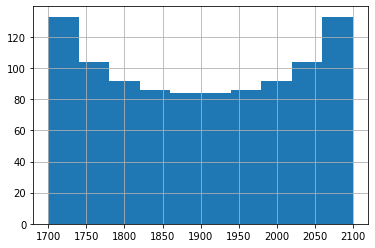

In [9]:
combined_orchid_data["SUNLIGHT"].hist()

<Axes: >

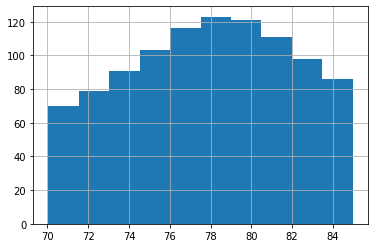

In [10]:
combined_orchid_data["HUMIDITY"].hist()

<Axes: >

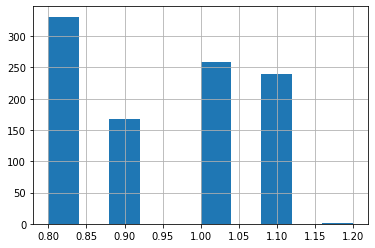

In [11]:
combined_orchid_data["TRANSPORT_FEES"].hist()

<Axes: >

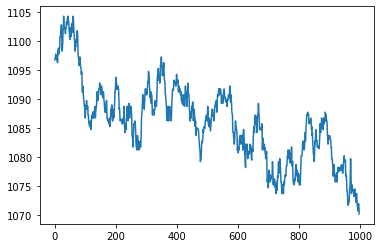

In [12]:
combined_orchid_data["ORCHIDS"].plot()

<Axes: >

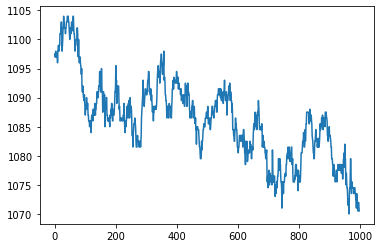

In [13]:
combined_orchid_data["mid_price"].plot()

In [14]:
parsed_data = combined_orchid_data[["SUNLIGHT", "HUMIDITY", "ORCHIDS", "mid_price"]]
parsed_data

,SUNLIGHT,HUMIDITY,ORCHIDS,mid_price
0,2099.5132,70.045395,1096.75,1097.5
1,2099.2683,70.068030,1097.00,1097.0
2,2099.0225,70.090640,1097.25,1097.0
3,2098.7756,70.113200,1097.75,1098.0
4,2098.5280,70.135720,1097.25,1097.0
...,...,...,...,...
993,1701.2242,84.906700,1070.75,1070.5
994,1700.9775,84.925300,1071.75,1071.5
995,1700.7317,84.943930,1072.00,1072.0
996,1700.4869,84.962590,1071.75,1071.5


In [15]:
# def add_lags(parsed_data):
#     lags = 3
#     for i in range(1, lags + 1):
#         parsed_data[f'lag{i}'] = parsed_data['mid_price'].shift(i)

#     parsed_data.dropna(inplace=True)
#     return parsed_data

In [55]:
# def add_lags(combined_orchid_data, tag):
#     lags = 100
#     for i in range(1, lags + 1):
#         combined_orchid_data[f'{tag}_lag{i}'] = combined_orchid_data[tag].shift(i)

#     combined_orchid_data.dropna(inplace=True)
#     return combined_orchid_data

In [17]:
# parsed_data = add_lags(parsed_data)
# parsed_data
poly = np.polynomial.Polynomial.fit(combined_orchid_data["timestamp"], combined_orchid_data["ORCHIDS"], 50)
# print(poly.coef[1])
# poly2 = np.polynomial.Polynomial(np.polyder([poly.coef[i] for i in range(50, -1, -1)], 1))
poly2 = poly.deriv()
# poly = np.polynomial.Polynomial(vals)

print(poly2)

# plt.scatter(combined_orchid_data.index.values, combined_orchid_data["ORCHIDS"])
# plt.plot(combined_orchid_data.index.values, poly(combined_orchid_data.index.values))
# plt.show()

0.0012453680027556897 + 0.028608851482663386·x¹ - 0.3782837645695045·x² -
2.4001931551060154·x³ + 22.068715225408752·x⁴ + 43.48768730113987·x⁵ -
676.0662917074702·x⁶ + 266.9884897095659·x⁷ + 13081.319599812792·x⁸ -
16252.574468178771·x⁹ - 166308.25365194152·x¹⁰ + 212797.58530362332·x¹¹ +
1411061.674003413·x¹² - 1468337.7369835747·x¹³ - 8087682.708772315·x¹⁴ +
6147716.359306082·x¹⁵ + 31385897.992306247·x¹⁶ - 16026388.196022417·x¹⁷ -
80747316.95630789·x¹⁸ + 24339002.640835658·x¹⁹ + 127163664.54897046·x²⁰ -
14546530.959863856·x²¹ - 86960198.53319947·x²² - 13171478.054131385·x²³ -
62388636.798928104·x²⁴ + 21767572.465233453·x²⁵ + 142092530.12997523·x²⁶ +
7798044.357561528·x²⁷ + 12244355.407465197·x²⁸ - 23009129.157161154·x²⁹ -
166904684.9404356·x³⁰ - 9172669.18440994·x³¹ + 7009831.8286196105·x³² +
22524664.331014547·x³³ + 193658692.4400533·x³⁴ + 13867267.703846201·x³⁵ -
15271705.413889581·x³⁶ - 20957720.77048094·x³⁷ - 229965008.0386·x³⁸ -
18490398.13336648·x³⁹ + 60008923.17978121·x⁴⁰ + 216

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [18]:
y_vals = np.array([poly(x) for x in combined_orchid_data["timestamp"]])
rate_of_change = np.array([poly2(x) for x in combined_orchid_data["timestamp"]])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


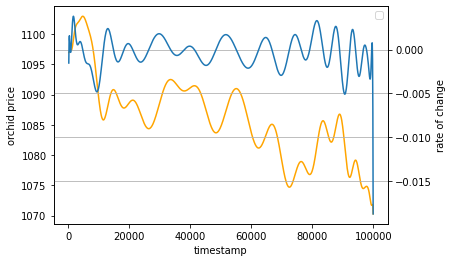

In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel('timestamp')
ax1.set_ylabel('orchid price')
ax2.set_ylabel('rate of change')
ax2.grid()
ax1.legend()

ax1.plot(combined_orchid_data["timestamp"], y_vals, color="orange")
ax2.plot(combined_orchid_data["timestamp"], rate_of_change)

# plt.plot(combined_orchid_data["timestamp"], combined_orchid_data["ORCHIDS"])

In [74]:
def add_lags(combined_orchid_data, tag):
    lags = 50
    for i in range(1, lags + 1):
        combined_orchid_data[f'{tag}_lag{i}'] = combined_orchid_data[tag].shift(i)

    combined_orchid_data.dropna(inplace=True)
    return combined_orchid_data

In [75]:
combined_orchid_data = add_lags(combined_orchid_data, "SUNLIGHT")
combined_orchid_data = add_lags(combined_orchid_data, "HUMIDITY")

x1 = combined_orchid_data[["SUNLIGHT_lag1", "SUNLIGHT_lag2", "SUNLIGHT_lag3", "SUNLIGHT_lag4", "SUNLIGHT_lag5", "SUNLIGHT_lag6", "SUNLIGHT_lag7", "SUNLIGHT_lag8"]] 
x1 = combined_orchid_data[[f"SUNLIGHT_lag{i}" for i in range(1, 51)]]
x1

# , "SUNLIGHT_lag3", "SUNLIGHT_lag4", "SUNLIGHT_lag5"

# combined_orchid_data

,SUNLIGHT_lag1,SUNLIGHT_lag2,SUNLIGHT_lag3,SUNLIGHT_lag4,SUNLIGHT_lag5,SUNLIGHT_lag6,SUNLIGHT_lag7,SUNLIGHT_lag8,SUNLIGHT_lag9,SUNLIGHT_lag10,...,SUNLIGHT_lag41,SUNLIGHT_lag42,SUNLIGHT_lag43,SUNLIGHT_lag44,SUNLIGHT_lag45,SUNLIGHT_lag46,SUNLIGHT_lag47,SUNLIGHT_lag48,SUNLIGHT_lag49,SUNLIGHT_lag50
520,1889.9491,1890.4275,1890.9059,1891.3843,1891.8628,1892.3413,1892.8198,1893.2983,1893.7770,1894.2555,...,1909.0941,1909.5725,1910.0509,1910.5292,1911.0074,1911.4857,1911.9639,1912.4420,1912.9200,1913.3981
521,1889.4708,1889.9491,1890.4275,1890.9059,1891.3843,1891.8628,1892.3413,1892.8198,1893.2983,1893.7770,...,1908.6157,1909.0941,1909.5725,1910.0509,1910.5292,1911.0074,1911.4857,1911.9639,1912.4420,1912.9200
522,1888.9926,1889.4708,1889.9491,1890.4275,1890.9059,1891.3843,1891.8628,1892.3413,1892.8198,1893.2983,...,1908.1372,1908.6157,1909.0941,1909.5725,1910.0509,1910.5292,1911.0074,1911.4857,1911.9639,1912.4420
523,1888.5143,1888.9926,1889.4708,1889.9491,1890.4275,1890.9059,1891.3843,1891.8628,1892.3413,1892.8198,...,1907.6587,1908.1372,1908.6157,1909.0941,1909.5725,1910.0509,1910.5292,1911.0074,1911.4857,1911.9639
524,1888.0361,1888.5143,1888.9926,1889.4708,1889.9491,1890.4275,1890.9059,1891.3843,1891.8628,1892.3413,...,1907.1802,1907.6587,1908.1372,1908.6157,1909.0941,1909.5725,1910.0509,1910.5292,1911.0074,1911.4857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1701.4719,1701.7206,1701.9701,1702.2205,1702.4719,1702.7242,1702.9774,1703.2316,1703.4867,1703.7427,...,1712.1240,1712.4084,1712.6937,1712.9797,1713.2667,1713.5546,1713.8433,1714.1327,1714.4231,1714.7142
994,1701.2242,1701.4719,1701.7206,1701.9701,1702.2205,1702.4719,1702.7242,1702.9774,1703.2316,1703.4867,...,1711.8405,1712.1240,1712.4084,1712.6937,1712.9797,1713.2667,1713.5546,1713.8433,1714.1327,1714.4231
995,1700.9775,1701.2242,1701.4719,1701.7206,1701.9701,1702.2205,1702.4719,1702.7242,1702.9774,1703.2316,...,1711.5579,1711.8405,1712.1240,1712.4084,1712.6937,1712.9797,1713.2667,1713.5546,1713.8433,1714.1327
996,1700.7317,1700.9775,1701.2242,1701.4719,1701.7206,1701.9701,1702.2205,1702.4719,1702.7242,1702.9774,...,1711.2760,1711.5579,1711.8405,1712.1240,1712.4084,1712.6937,1712.9797,1713.2667,1713.5546,1713.8433


In [76]:
x2 = combined_orchid_data[["HUMIDITY_lag1", "HUMIDITY_lag2", "HUMIDITY_lag3", "HUMIDITY_lag4", "HUMIDITY_lag5", "HUMIDITY_lag6", "HUMIDITY_lag7", "HUMIDITY_lag8"]]
x2 = combined_orchid_data[[f"HUMIDITY_lag{i}" for i in range(1, 51)]]
x2

# 

,HUMIDITY_lag1,HUMIDITY_lag2,HUMIDITY_lag3,HUMIDITY_lag4,HUMIDITY_lag5,HUMIDITY_lag6,HUMIDITY_lag7,HUMIDITY_lag8,HUMIDITY_lag9,HUMIDITY_lag10,...,HUMIDITY_lag41,HUMIDITY_lag42,HUMIDITY_lag43,HUMIDITY_lag44,HUMIDITY_lag45,HUMIDITY_lag46,HUMIDITY_lag47,HUMIDITY_lag48,HUMIDITY_lag49,HUMIDITY_lag50
520,78.254005,78.241940,78.229870,78.217804,78.205734,78.193660,78.181580,78.169495,78.157410,78.145325,...,77.768684,77.756460,77.744230,77.731995,77.719760,77.707510,77.695260,77.683000,77.67074,77.658470
521,78.266070,78.254005,78.241940,78.229870,78.217804,78.205734,78.193660,78.181580,78.169495,78.157410,...,77.780900,77.768684,77.756460,77.744230,77.731995,77.719760,77.707510,77.695260,77.68300,77.670740
522,78.278130,78.266070,78.254005,78.241940,78.229870,78.217804,78.205734,78.193660,78.181580,78.169495,...,77.793110,77.780900,77.768684,77.756460,77.744230,77.731995,77.719760,77.707510,77.69526,77.683000
523,78.290184,78.278130,78.266070,78.254005,78.241940,78.229870,78.217804,78.205734,78.193660,78.181580,...,77.805320,77.793110,77.780900,77.768684,77.756460,77.744230,77.731995,77.719760,77.70751,77.695260
524,78.302240,78.290184,78.278130,78.266070,78.254005,78.241940,78.229870,78.217804,78.205734,78.193660,...,77.817530,77.805320,77.793110,77.780900,77.768684,77.756460,77.744230,77.731995,77.71976,77.707510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,84.888140,84.869600,84.851090,84.832610,84.814156,84.795740,84.777350,84.758990,84.740660,84.722360,...,84.169240,84.151850,84.134480,84.117140,84.099830,84.082540,84.065280,84.048050,84.03084,84.013664
994,84.906700,84.888140,84.869600,84.851090,84.832610,84.814156,84.795740,84.777350,84.758990,84.740660,...,84.186670,84.169240,84.151850,84.134480,84.117140,84.099830,84.082540,84.065280,84.04805,84.030840
995,84.925300,84.906700,84.888140,84.869600,84.851090,84.832610,84.814156,84.795740,84.777350,84.758990,...,84.204120,84.186670,84.169240,84.151850,84.134480,84.117140,84.099830,84.082540,84.06528,84.048050
996,84.943930,84.925300,84.906700,84.888140,84.869600,84.851090,84.832610,84.814156,84.795740,84.777350,...,84.221596,84.204120,84.186670,84.169240,84.151850,84.134480,84.117140,84.099830,84.08254,84.065280


In [22]:
# y = combined_orchid_data["SUNLIGHT"]
# # , "HUMIDITY"]]
# y

In [23]:
# y2 = combined_orchid_data["HUMIDITY"]
# y2

In [77]:
y = combined_orchid_data["ORCHIDS"]
y

520    1087.00
521    1086.25
522    1087.25
523    1087.50
524    1088.75
        ...   
993    1070.75
994    1071.75
995    1072.00
996    1071.75
997    1070.25
Name: ORCHIDS, Length: 478, dtype: float64

In [78]:
model = LinearRegression()
model.fit(x1, y)
pred = model.predict(x1)
combined_orchid_data["pred"] = pred
combined_orchid_data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,bid_price_1,bid_volume_1,...,HUMIDITY_lag91,HUMIDITY_lag92,HUMIDITY_lag93,HUMIDITY_lag94,HUMIDITY_lag95,HUMIDITY_lag96,HUMIDITY_lag97,HUMIDITY_lag98,HUMIDITY_lag99,HUMIDITY_lag100
520,52200,1087.00,1.1,8.5,-4.5,1889.4708,78.266070,1,1083,9,...,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975,77.061340,77.048706,77.036060
521,52300,1086.25,1.1,8.5,-4.5,1888.9926,78.278130,1,1083,8,...,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975,77.061340,77.048706
522,52400,1087.25,1.1,8.5,-4.5,1888.5143,78.290184,1,1084,7,...,77.174700,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975,77.061340
523,52500,1087.50,1.1,8.5,-4.5,1888.0361,78.302240,1,1084,5,...,77.187250,77.174700,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975
524,52600,1088.75,1.1,8.5,-4.5,1887.5580,78.314290,1,1085,7,...,77.199790,77.187250,77.174700,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,1067,5,...,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050,83.219070,83.203110,83.187180
994,99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,1068,7,...,83.347565,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050,83.219070,83.203110
995,99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,1068,5,...,83.363730,83.347565,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050,83.219070
996,99800,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,1068,8,...,83.379930,83.363730,83.347565,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050


In [79]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Accuracy:", model.score(x1, y))

Coefficients: [-3.64548206e+03 -2.32627008e+03 -1.56383540e+03 -8.28842275e+02
 -8.72703334e+02  3.15602970e+00 -6.44501386e+02 -6.20585256e+02
 -1.37785989e+03  9.77640786e+01  1.55638657e+03  2.70497188e+02
  1.51569257e+03  2.41541859e+03  4.14546256e+03  5.50179728e+03
  2.92281538e+03  3.04824013e+03  8.66304852e+02  1.28500755e+03
  1.45878118e+03  1.26658787e+03 -4.01105705e+02 -4.73765534e+02
 -2.67185072e+03 -1.48626715e+03 -1.30833500e+03 -1.63461609e+02
 -1.77451531e+02  3.52034817e+02  3.18035400e+02  1.10348078e+03
 -1.43677794e+03 -1.93069116e+03 -6.02032024e+02 -2.11532769e+03
 -3.65752601e+03 -4.67674852e+03 -2.88876891e+03 -1.23092103e+03
  2.45625318e+02  4.55907739e+02  4.41801471e+02  1.53265451e+03
  2.16643232e+03  1.22978068e+03 -2.90740831e+02  1.31687774e+03
  1.03264107e+03  8.39031125e+02]
Intercept: 8487.749671533693
Accuracy: 0.6078330337863279


In [80]:
model2 = LinearRegression()
model2.fit(x2, y)
pred2 = model2.predict(x2)
combined_orchid_data["pred2"] = pred2
combined_orchid_data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,bid_price_1,bid_volume_1,...,HUMIDITY_lag91,HUMIDITY_lag92,HUMIDITY_lag93,HUMIDITY_lag94,HUMIDITY_lag95,HUMIDITY_lag96,HUMIDITY_lag97,HUMIDITY_lag98,HUMIDITY_lag99,HUMIDITY_lag100
520,52200,1087.00,1.1,8.5,-4.5,1889.4708,78.266070,1,1083,9,...,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975,77.061340,77.048706,77.036060
521,52300,1086.25,1.1,8.5,-4.5,1888.9926,78.278130,1,1083,8,...,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975,77.061340,77.048706
522,52400,1087.25,1.1,8.5,-4.5,1888.5143,78.290184,1,1084,7,...,77.174700,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975,77.061340
523,52500,1087.50,1.1,8.5,-4.5,1888.0361,78.302240,1,1084,5,...,77.187250,77.174700,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590,77.073975
524,52600,1088.75,1.1,8.5,-4.5,1887.5580,78.314290,1,1085,7,...,77.199790,77.187250,77.174700,77.162140,77.149570,77.136990,77.124405,77.111810,77.099205,77.086590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,1067,5,...,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050,83.219070,83.203110,83.187180
994,99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,1068,7,...,83.347565,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050,83.219070,83.203110
995,99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,1068,5,...,83.363730,83.347565,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050,83.219070
996,99800,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,1068,8,...,83.379930,83.363730,83.347565,83.331420,83.315300,83.299200,83.283130,83.267075,83.251050,83.235050


In [81]:
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("Accuracy:", model2.score(x2, y))

Coefficients: [ 50092.47227086  23849.29583417  19645.3314205   24406.71385305
  13915.19030104  11653.67495364   7408.91304391  -1961.61482239
  24586.55114303 -24159.15803237 -31340.44418525 -18483.14792593
 -30784.44757695 -37787.7206419  -42660.53536353 -41525.13151781
 -32836.7398859   -4964.96558892 -30248.1140924  -27734.71251759
   7084.0705233    4154.67473732 -17453.92846534 -12001.89968164
  14075.19976103  23769.71560282   4392.68528326   4195.87595367
  17853.58058603   1419.58519849  15045.64656837  27423.61778922
  -9937.54520219   1176.4453009   26684.32453929  33707.62692608
  14357.09668345  28936.97823088  29278.96932031  38652.09257594
   6328.9397696  -11030.57874756 -17322.71723848 -11174.26820225
 -28633.06608647 -35578.39589674   4019.42427148  -4614.16645875
  -3404.03783514  -2577.33069694]
Intercept: 8700.776027680733
Accuracy: 0.6052260789312435


In [84]:
print("[")
for coef in model2.coef_:
    print(coef, end = ", ")
print("]")

[
50092.47227086169, 23849.29583416846, 19645.33142050289, 24406.713853054385, 13915.190301035656, 11653.674953643347, 7408.9130439089195, -1961.614822387029, 24586.551143033274, -24159.158032374235, -31340.444185253902, -18483.14792592816, -30784.44757694956, -37787.72064189821, -42660.535363527815, -41525.13151780734, -32836.73988590403, -4964.965588924674, -30248.11409240085, -27734.712517593453, 7084.070523296734, 4154.674737321573, -17453.928465342146, -12001.899681643261, 14075.199761027403, 23769.715602819007, 4392.68528325567, 4195.87595367201, 17853.580586032615, 1419.585198485245, 15045.646568365455, 27423.617789224198, -9937.545202194678, 1176.4453009003478, 26684.3245392882, 33707.62692608268, 14357.096683454778, 28936.978230880453, 29278.96932031025, 38652.09257593764, 6328.939769602227, -11030.578747555735, -17322.717238482364, -11174.26820224621, -28633.066086474275, -35578.39589674345, 4019.4242714812835, -4614.166458754578, -3404.0378351370564, -2577.330696944327, ]


# Data Analysis II

In [ ]:
path1 = f"./data/round_2/prices_round_2_day_-1.csv"
path2 = f"./data/round_2/prices_round_2_day_0.csv"
path3 = f"./data/round_2/prices_round_2_day_1.csv"
results_path = f"./data/round_2/algo_results.csv"

In [10]:
prices = pd.read_csv(results_path, index_col="timestamp", delimiter=";")
prices

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
200,1,AMETHYSTS,9998,1,9996.0,3.0,9995.0,77.0,10004,3,10005.0,77.0,NaN,NaN,10001.0,0.000000
200,1,ORCHIDS,1094,16,1093.0,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5,0.000000
200,1,STARFRUIT,5048,3,5047.0,78.0,NaN,NaN,5052,4,5054.0,80.0,NaN,NaN,5050.0,0.000000
300,1,AMETHYSTS,9996,1,9995.0,27.0,NaN,NaN,9998,1,10004.0,1.0,10005.0,27.0,9997.0,0.000000
300,1,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5054,28,NaN,NaN,NaN,NaN,5050.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99800,1,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,1489.000000
99800,1,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,0.000000
99900,1,STARFRUIT,5043,28,NaN,NaN,NaN,NaN,5050,28,NaN,NaN,NaN,NaN,5046.5,1367.945312


In [11]:
data_AMETHYSTS = prices.loc[prices['product']=='AMETHYSTS'][['mid_price']].rename(columns={'mid_price': 'AMETHYSTS'})
data_STARFRUIT = prices.loc[prices['product']=='STARFRUIT'][['mid_price']].rename(columns={'mid_price': 'STARFRUIT'})
data_ORCHIDS = prices.loc[prices['product']=='ORCHIDS'][['mid_price']].rename(columns={'mid_price': 'ORCHIDS'})
# data_pina_coladas = data.loc[data['product']=='PINA_COLADAS'][['mid_price']].rename(columns={'mid_price': 'pina_coladas'})
# data_coconuts = data.loc[data['product']=='COCONUTS'][['mid_price']].rename(columns={'mid_price': 'coconuts'})
# data_berries = data.loc[data['product']=='BERRIES'][['mid_price']].rename(columns={'mid_price': 'berries'})
# data_diving_gear = data.loc[data['product']=='DIVING_GEAR'][['mid_price']].rename(columns={'mid_price': 'diving_gear'})
# data_dolphin_sightings = data.loc[data['product']=='DOLPHIN_SIGHTINGS'][['mid_price']].rename(columns={'mid_price': 'dolphin_sightings'})
# data_CHOCOLATE = prices.loc[prices['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'CHOCOLATE'})
# data_STRAWBERRIES = prices.loc[prices['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'STRAWBERRIES'})
# data_GIFT_basket = prices.loc[prices['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'GIFT_basket'})
# data_ROSES = prices.loc[prices['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'ROSES'})
prices = pd.concat([data_AMETHYSTS, data_STARFRUIT, data_ORCHIDS], axis=1)
prices.columns = pd.MultiIndex.from_product([['mid_price'], prices.columns.tolist()])
prices

mid_price                  
          AMETHYSTS STARFRUIT ORCHIDS
timestamp                            
200         10001.0    5050.0  1097.5
300          9997.0    5050.5  1097.0
400         10000.0    5051.0  1097.0
500         10000.0    5051.5  1098.0
600         10000.0    5050.5  1097.0
...             ...       ...     ...
99500       10001.0    5046.5  1070.5
99600       10001.0    5047.0  1071.5
99700       10000.0    5047.0  1072.0
99800       10000.0    5047.0  1071.5
99900       10000.0    5046.5  1070.5

[998 rows x 3 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

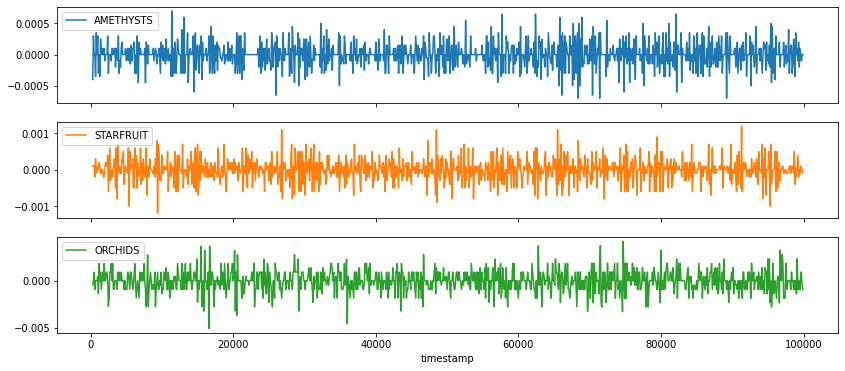

In [12]:
returns = np.log(prices['mid_price']/ prices['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='AMETHYSTS', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STARFRUIT', ylabel='AMETHYSTS'>,
        <Axes: xlabel='ORCHIDS', ylabel='AMETHYSTS'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='STARFRUIT'>,
        <Axes: xlabel='STARFRUIT', ylabel='STARFRUIT'>,
        <Axes: xlabel='ORCHIDS', ylabel='STARFRUIT'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='ORCHIDS'>,
        <Axes: xlabel='STARFRUIT', ylabel='ORCHIDS'>,
        <Axes: xlabel='ORCHIDS', ylabel='ORCHIDS'>]], dtype=object)

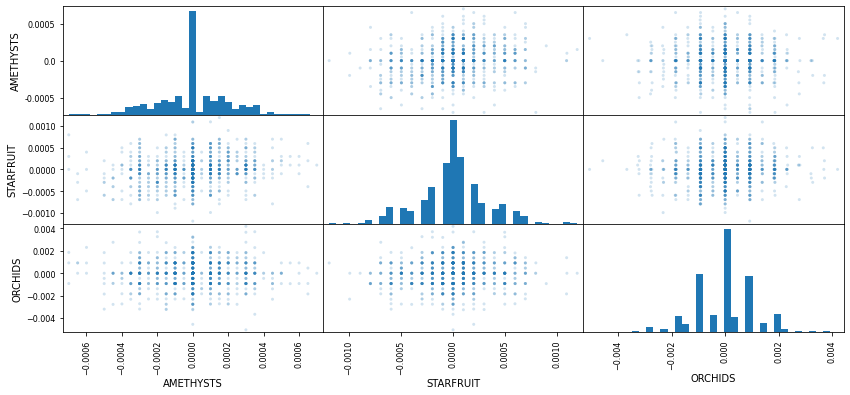

In [13]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

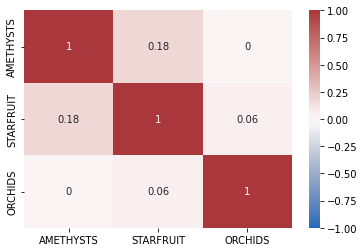

In [17]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

# Humidity and Sunlight

In [19]:
path1 = f"./data/round_2/prices_round_2_day_-1.csv"
path2 = f"./data/round_2/prices_round_2_day_0.csv"
path3 = f"./data/round_2/prices_round_2_day_1.csv"

In [90]:
data1 = pd.read_csv(path1, index_col="timestamp", delimiter=";")
data2 = pd.read_csv(path2, index_col="timestamp", delimiter=";")
data3 = pd.read_csv(path3, index_col="timestamp", delimiter=";")

In [91]:
data1

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1
100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1
200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1
300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1
400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...
999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1
999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1
999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1


In [92]:
data2

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000,0
100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990,0
200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980,0
300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970,0
400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950,0
...,...,...,...,...,...,...,...
999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100,0
999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806,0
999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530,0


In [93]:
data3

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...
999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1


In [97]:
# orchid_data = data1
orchid_data = pd.concat([data1, data2, data3]).fillna(0)
orchid_data

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...
999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1


In [98]:
# orchids = orchid_data.loc[[True for _ in range(30003)]][['ORCHIDS']].rename(columns={'value': 'ORCHIDS'})
# sunlight = orchid_data.loc[[True for _ in range(30003)]][['SUNLIGHT']].rename(columns={'value': 'SUNLIGHT'})
# sunlight = orchid_data.loc[[True for _ in range(30003)]][['SUNLIGHT']].rename(columns={'value': 'SUNLIGHT'})
# sunlight = orchid_data.loc[[True for _ in range(30003)]][['SUNLIGHT']].rename(columns={'value': 'SUNLIGHT'})
# sunlight = orchid_data.loc[[True for _ in range(30003)]][['SUNLIGHT']].rename(columns={'value': 'SUNLIGHT'})
# sunlight = orchid_data.loc[[True for _ in range(30003)]][['SUNLIGHT']].rename(columns={'value': 'SUNLIGHT'})
orchid_data = orchid_data[["ORCHIDS", "SUNLIGHT", "HUMIDITY", "EXPORT_TARIFF", "IMPORT_TARIFF"]]
orchid_data.columns = pd.MultiIndex.from_product([['values'], orchid_data.columns.tolist()])

In [99]:
orchid_data

values                                                 
           ORCHIDS   SUNLIGHT  HUMIDITY EXPORT_TARIFF IMPORT_TARIFF
timestamp                                                          
0          1200.00  2500.0000  79.00000          10.5          -2.0
100        1201.75  2499.4197  79.00410           9.5          -2.0
200        1201.75  2498.8457  79.00821           9.5          -2.0
300        1201.75  2498.2780  79.01234           9.5          -2.0
400        1201.75  2497.7166  79.01649           9.5          -2.0
...            ...        ...       ...           ...           ...
999600     1036.25  2299.9436  69.93549           9.5          -5.0
999700     1036.25  2299.9556  69.95153           9.5          -5.0
999800     1036.25  2299.9690  69.96762           9.5          -5.0
999900     1034.25  2299.9840  69.98378           9.5          -5.0
1000000    1035.25  2300.0000  70.00000           9.5          -5.0

[30003 rows x 5 columns]

In [116]:
orchid_data.dropna()

values                                                 
           ORCHIDS   SUNLIGHT  HUMIDITY EXPORT_TARIFF IMPORT_TARIFF
timestamp                                                          
0          1200.00  2500.0000  79.00000          10.5          -2.0
100        1201.75  2499.4197  79.00410           9.5          -2.0
200        1201.75  2498.8457  79.00821           9.5          -2.0
300        1201.75  2498.2780  79.01234           9.5          -2.0
400        1201.75  2497.7166  79.01649           9.5          -2.0
...            ...        ...       ...           ...           ...
999600     1036.25  2299.9436  69.93549           9.5          -5.0
999700     1036.25  2299.9556  69.95153           9.5          -5.0
999800     1036.25  2299.9690  69.96762           9.5          -5.0
999900     1034.25  2299.9840  69.98378           9.5          -5.0
1000000    1035.25  2300.0000  70.00000           9.5          -5.0

[30003 rows x 5 columns]

In [131]:
variables = np.log(orchid_data['values']/ orchid_data['values'].shift(1))
variables.dropna(inplace=True)
variables
# print(variables)
# print(variables.loc[variables["ORCHIDS"] < -0.005])
# print(variables.loc[variables["ORCHIDS"] == -0.099451])
# sum(variables["ORCHIDS"])/30003

,ORCHIDS,SUNLIGHT,HUMIDITY,EXPORT_TARIFF,IMPORT_TARIFF
timestamp,,,,,
100,0.001457,-0.000232,0.000052,-0.100083,0.0
200,0.000000,-0.000230,0.000052,0.000000,0.0
300,0.000000,-0.000227,0.000052,0.000000,0.0
400,0.000000,-0.000225,0.000053,0.000000,0.0
500,-0.001249,-0.000222,0.000053,0.000000,0.0
...,...,...,...,...,...
999600,-0.002410,0.000005,0.000228,0.000000,0.0
999700,0.000000,0.000005,0.000229,0.000000,0.0
999800,0.000000,0.000006,0.000230,0.000000,0.0


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

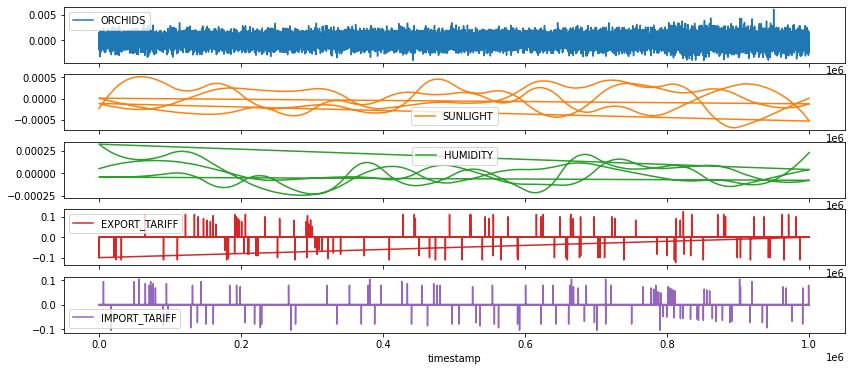

In [145]:

variables.loc[abs(variables["ORCHIDS"]) < 0.05].plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='ORCHIDS', ylabel='ORCHIDS'>,
        <Axes: xlabel='SUNLIGHT', ylabel='ORCHIDS'>,
        <Axes: xlabel='HUMIDITY', ylabel='ORCHIDS'>,
        <Axes: xlabel='EXPORT_TARIFF', ylabel='ORCHIDS'>,
        <Axes: xlabel='IMPORT_TARIFF', ylabel='ORCHIDS'>],
       [<Axes: xlabel='ORCHIDS', ylabel='SUNLIGHT'>,
        <Axes: xlabel='SUNLIGHT', ylabel='SUNLIGHT'>,
        <Axes: xlabel='HUMIDITY', ylabel='SUNLIGHT'>,
        <Axes: xlabel='EXPORT_TARIFF', ylabel='SUNLIGHT'>,
        <Axes: xlabel='IMPORT_TARIFF', ylabel='SUNLIGHT'>],
       [<Axes: xlabel='ORCHIDS', ylabel='HUMIDITY'>,
        <Axes: xlabel='SUNLIGHT', ylabel='HUMIDITY'>,
        <Axes: xlabel='HUMIDITY', ylabel='HUMIDITY'>,
        <Axes: xlabel='EXPORT_TARIFF', ylabel='HUMIDITY'>,
        <Axes: xlabel='IMPORT_TARIFF', ylabel='HUMIDITY'>],
       [<Axes: xlabel='ORCHIDS', ylabel='EXPORT_TARIFF'>,
        <Axes: xlabel='SUNLIGHT', ylabel='EXPORT_TARIFF'>,
        <Axes: xlabel='HUMIDITY', ylabel='EXPORT

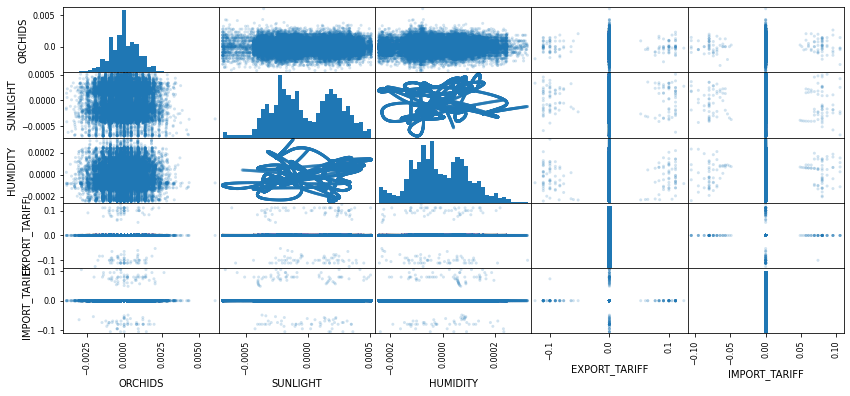

In [144]:
pd.plotting.scatter_matrix(variables.loc[abs(variables["ORCHIDS"]) < 0.05], alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

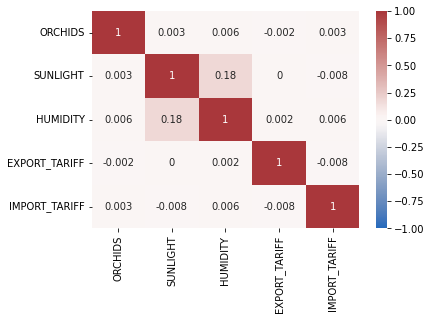

In [143]:
sns.heatmap(variables.loc[abs(variables["ORCHIDS"]) < 0.05].corr().round(3), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [140]:
x100 = np.arange(0, 3000000, 100)

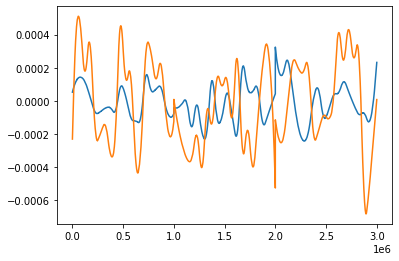

In [141]:
plt.plot(x100, variables.loc[abs(variables["ORCHIDS"]) < 0.05]["HUMIDITY"])
plt.plot(x100, variables.loc[abs(variables["ORCHIDS"]) < 0.05]["SUNLIGHT"])
plt.show()

# Day 2

In [94]:
orchid_data = data1
# orchid_data = pd.concat([data1, data2, data3]).fillna(0)
orchid_data

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1
100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1
200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1
300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1
400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...
999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1
999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1
999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

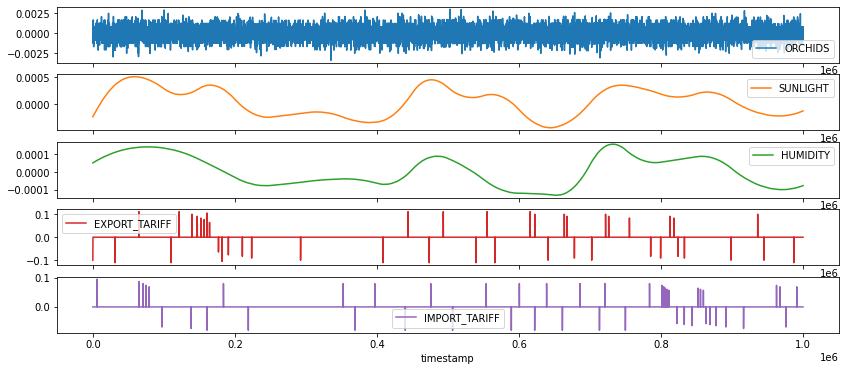

In [95]:
orchid_data = orchid_data[["ORCHIDS", "SUNLIGHT", "HUMIDITY", "EXPORT_TARIFF", "IMPORT_TARIFF"]]
orchid_data.columns = pd.MultiIndex.from_product([['values'], orchid_data.columns.tolist()])

variables = np.log(orchid_data['values']/ orchid_data['values'].shift(1))
variables.dropna(inplace=True)
variables.plot(subplots=True, figsize=(14,6))


array([[<Axes: xlabel='ORCHIDS', ylabel='ORCHIDS'>,
        <Axes: xlabel='SUNLIGHT', ylabel='ORCHIDS'>,
        <Axes: xlabel='HUMIDITY', ylabel='ORCHIDS'>,
        <Axes: xlabel='EXPORT_TARIFF', ylabel='ORCHIDS'>,
        <Axes: xlabel='IMPORT_TARIFF', ylabel='ORCHIDS'>],
       [<Axes: xlabel='ORCHIDS', ylabel='SUNLIGHT'>,
        <Axes: xlabel='SUNLIGHT', ylabel='SUNLIGHT'>,
        <Axes: xlabel='HUMIDITY', ylabel='SUNLIGHT'>,
        <Axes: xlabel='EXPORT_TARIFF', ylabel='SUNLIGHT'>,
        <Axes: xlabel='IMPORT_TARIFF', ylabel='SUNLIGHT'>],
       [<Axes: xlabel='ORCHIDS', ylabel='HUMIDITY'>,
        <Axes: xlabel='SUNLIGHT', ylabel='HUMIDITY'>,
        <Axes: xlabel='HUMIDITY', ylabel='HUMIDITY'>,
        <Axes: xlabel='EXPORT_TARIFF', ylabel='HUMIDITY'>,
        <Axes: xlabel='IMPORT_TARIFF', ylabel='HUMIDITY'>],
       [<Axes: xlabel='ORCHIDS', ylabel='EXPORT_TARIFF'>,
        <Axes: xlabel='SUNLIGHT', ylabel='EXPORT_TARIFF'>,
        <Axes: xlabel='HUMIDITY', ylabel='EXPORT

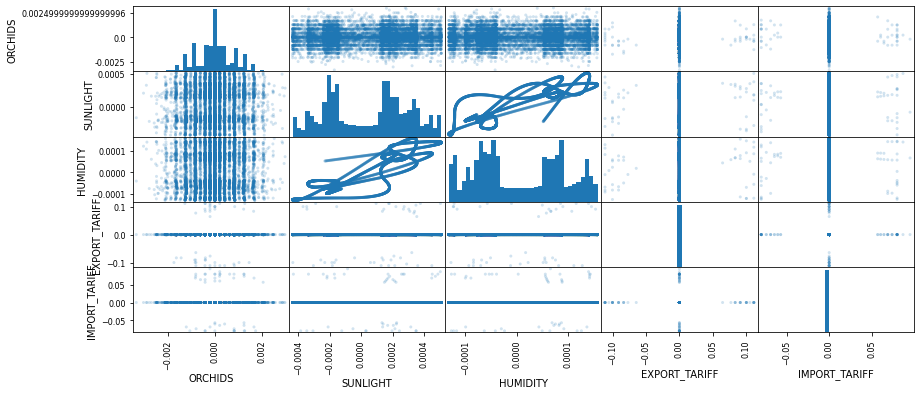

In [96]:
pd.plotting.scatter_matrix(variables, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))